In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sympy as sp
from sympy import symbols, diff, Eq, solve
from sympy import *
import operator
import math

In [11]:
plt.style.use('dark_background')

### Defining functions:

In [12]:
x, y = symbols('x y', real=True)

In [13]:
def f(x, y):
    return 2*x**3 + 6*x*y**2 - 3*y**3 - 150*x

### We are looking for minimum, maximum and stationary points:

Partial derivatives: 

In [14]:
dx = diff(f(x,y), x)
dy = diff(f(x,y), y)
dxdx = diff(dx,x)
dydy = diff(dy,y)
dxdy = diff(dy, x)

Looking for stationary points: 

In [15]:
eq1 = Eq((dx), 0)
eq2 = Eq((dy), 0)



solutions = solve((eq1, eq2), (x, y))
how_many_stationary_points = len(solutions)

In [16]:
def count_boundaries(list_of_points):
    
    min_x = 0
    min_y = 0
    max_x = 0
    max_y = 0
    
    for i in list_of_points:
        if i[0] < min_x:
            min_x = i[0]
        elif i[0] > max_x:
            max_x = i[0]
        if i[1] < min_y:
            min_y = i[1]
        elif i[1] > max_y:
            max_y = i[1]
        
    width = abs(min_x - max_x)
    height = abs(min_y - max_y)
    
    min_x -= 0.5 * (width + 1)
    max_x += 0.5 * (width + 1)
    
    min_y -= 0.5 * (height + 1)
    max_y += 0.5 * (height + 1)
            
    return [int(math.floor(min_x)), int(math.ceil(max_x)), int(math.floor(min_y)), int(math.ceil(max_y))]

In [17]:
def stationary_points_classifier(point, dxdx, dydy, dxdy):
    
    dxdx_point = dxdx.subs([(x, point[0]), (y, point[1])])
    dydy_point = dydy.subs([(x, point[0]), (y, point[1])])
    dxdy_point =  dxdy.subs([(x, point[0]), (y, point[1])])

    eq_point = dxdx_point*dydy_point - dxdy_point**2
    returner = ''

    if eq_point < 0:
        returner = 'saddle point'

    elif eq_point > 0 and  dxdx_point < 0 and dydy_point < 0:
        returner = 'maximum'

    elif eq_point > 0 and  dxdx_point > 0 and dydy_point > 0:
        returner = 'minimum'

    elif eq_point == 0:
        returner = 'does not decide'

    else:
        returner = 'solution is not undefined'

    return returner

In [18]:
list_of_classified_points = []
for i in range(how_many_stationary_points):
    list_of_classified_points.append(stationary_points_classifier(solutions[i], dxdx, dydy, dxdy))
print(list_of_classified_points)

['maximum', 'saddle point', 'saddle point', 'minimum']


In [19]:
[min_x, max_x, min_y, max_y] = count_boundaries(solutions)

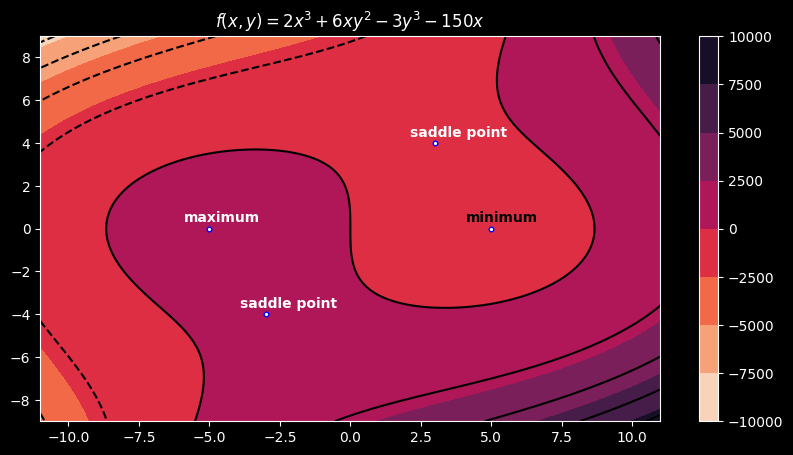

In [20]:
fig = plt.figure(figsize=(10, 5))
x = np.arange(min_x, max_x, 0.01)
y = np.arange(min_y, max_y, 0.01)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

my_colormap = sns.color_palette("crest", as_cmap=True)
my_colormap1 = sns.color_palette("rocket_r", as_cmap=True)
CS = plt.contour(X, Y, Z, 10, colors = 'black') 
contour_filled = plt.contourf(X, Y,  Z, cmap = my_colormap1)
plt.colorbar(contour_filled)


for i in range(len(solutions)):
    

    
    plt.scatter(solutions[i][0], solutions[i][1], s = 11, c='white', marker='o', linewidths=None,edgecolors='blue', 
                plotnonfinite=False)
    
    if list_of_classified_points[i] == 'minimum':
        plt.text(solutions[i][0]-0.9, solutions[i][1] + 0.3, list_of_classified_points[i], color = 'black', fontweight = 'bold')
    else:
        plt.text(solutions[i][0]-0.9, solutions[i][1] + 0.3, list_of_classified_points[i], color = 'white', fontweight = 'bold')


plt.title('$f(x,y) = 2x^3 + 6xy^2 - 3y^3 - 150x$')
plt.savefig('09_Jablonska_280108.pdf')
plt.show()